# The Viewer Component
The interactive viewer for IFC models has been extended from Thomas Paviots' excellent [JupyterRenderer](https://github.com/tpaviot/pythonocc-core/blob/master/src/Display/WebGl/jupyter_renderer.py) and offeres a number of functionalities:

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ifcopenshell
#m = ifcopenshell.open("../data/hello_reiff_2021.ifc")
m = ifcopenshell.open("../data/231110AC-11-Smiley-West-04-07-2007.ifc")

To invoke it we have to import the models residing in the local `utils` folder.

In [ ]:
from utils.JupyterIFCRenderer import JupyterIFCRenderer
viewer = JupyterIFCRenderer(m, size=(400,300))
viewer

Instances of building elements with represenations can be selected interactivly. Information such as the attributes `GUID`, `Name` etc. are displayed to the left of the 3D viewport.

In [4]:
viewer.setDefaultColors()

## Selecting instances 

The instance object currently selected in the 3D view can be assigned to a avariable using the `.getSelectedProduct()` method. 

Provding the plain varialbe name call sthe `Display()`-method of the instance and prints the line of the original ifc-Datei the  [SPFF-format](https://en.wikipedia.org/wiki/ISO_10303-21).


In [5]:
selection = viewer.getSelectedProduct()
selection

## Show / Hide Objects
Programatically or interactively selected projects can be hidden or shown in the viewer using `setVisible()`.


In [9]:
viewer.setVisible(selection, False)
viewer

Opening elements are displayed by default. Let's hide them.

In [10]:
for opening in m.by_type("IfcOpeningElement"):
    viewer.setVisible(opening, False)

## Coloring Objects
Objects can be colored either by hexadicimal numbers provided as strings as they are common in e.g. in HTML and CSS and can be retrieved from many ressources

In [11]:

viewer.setColorSelected("#ddffaa")
viewer

If you do not happen to have a color in mind  just call a color picker from the viewer:

In [12]:
picker = viewer.colorPicker()
picker

ColorPicker(value='blue', description='Pick a color')

In [13]:
viewer.setColorSelected(picker.value)

### Default colors
a number of colors has been defined as a fallback palette and can be called using `viewer.setDefaultColors()`

In [14]:
viewer.setDefaultColors()

In [82]:
auswahl.GlobalId

## Relations

![ifc-fills-voids-element-relation.png](../img/ifc-fills-voids-element-relation.png)
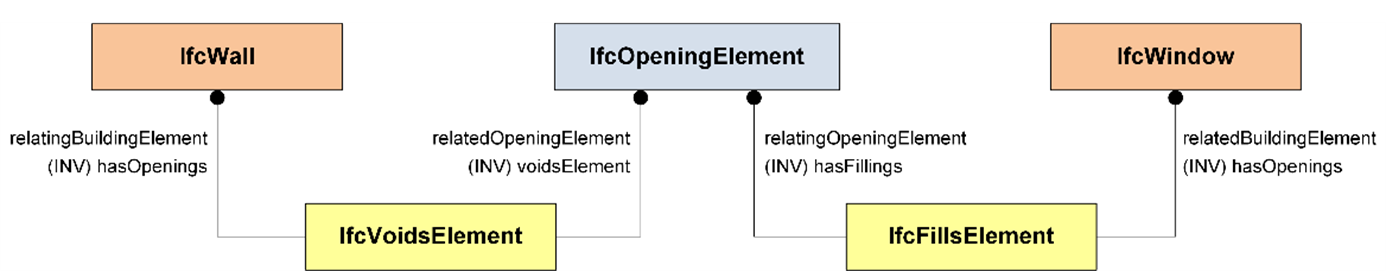

In [59]:
## Schema und Intropsektion
import ifcopenshell.util
import ifcopenshell.util.element
print(ifcopenshell.util.element.get_psets(auswahl))

{}


In [60]:
print(m.get_inverse(auswahl))

[#44=IfcRelContainedInSpatialStructure('2O_dMuDnr1Ahv28oR6ZVpr',#2,'Default Building','Contents of Building Storey',(#45,#97,#127),#35), #109=IfcRelVoidsElement('3lR5koIT51Kwudkm5eIoTu',#2,$,$,#45,#97), #131=IfcRelFillsElement('1CDlLMVMv1qw1giUXpQgxI',#2,$,$,#97,#124)]


Mit der Funktion `m.wrapped_data.types()` können wir uns alle im Modell verwendeten Datenypen anzeigen lassen:

In [ ]:
viewer.setDefaultColors()

In [ ]:
tree_settings = ifcopenshell.geom.settings()
tree_settings.set(tree_settings.DISABLE_OPENING_SUBTRACTIONS, True)
t = ifcopenshell.geom.tree(m, tree_settings)
    

In [ ]:
wall = m.by_type("IfcWall")[0]
print("Intersecting with wall 2O2Fr$t4X7Zf8NOew3FLPP")
print(t.select(wall))



In [ ]:
sel = t.select(wall)
type(sel[0])

In [ ]:
list(viewer._meshdict.values())[0].material.metallness=0.0
list(viewer._meshdict.values())[0].material.

In [16]:
viewer.DisplayShapeAsSVG(viewer.elementdict.get(m.by_type("IfcWall")[0]))

svg exporter not available because the svgwrite package is not installed.
please use '$ conda install -c conda-forge svgwrite'


TypeError: a bytes-like object is required, not 'bool'

In [ ]:
list(viewer._meshdict.values())[0].material.__dict__


